# Step 1 - Setup

In [ ]:
from google.colab import userdata
api_key = userdata.get('genai_course')

In [ ]:
%cd /content/drive/MyDrive/GenAI/RAG/Multimodal RAG

/content/drive/MyDrive/GenAI/RAG/Multimodal RAG


# Step 2 - Get The Data

In [ ]:
#Define the Video Path
video_path = "decision-making-course.mp4"

# Step 3 - Extract The Audio and Compress

In [ ]:
# Install libararies
!pip install -q pydub
!apt-get install -q ffmpeg

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [ ]:
#Import libraries
import os
import subprocess
from pydub import AudioSegment

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [ ]:
#Define the audio path
audio_output_path = "audios/output.mp3"

In [ ]:
#Ensure the output directory exists
output_dir = os.path.dirname(audio_output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [ ]:
#Ensure the outpit file has the correct extension
if not audio_output_path.endswith(".mp3"):
    audio_output_path += ".mp3"

In [ ]:
#Construct the ffmpeg command to extract audio
command =[
    'ffmpeg',
    '-y', #overwrites if the audio exists
    '-i', video_path, #input file
    '-vn', # No video
    '-acodec', 'libmp3lame', #Audio codecs
    audio_output_path # Output file
]

In [ ]:
#Execute the command to extract the audio
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'decision-making-course.mp4', '-vn', '-acodec', 'libmp3lame', 'audios/output.mp3'], returncode=0)

In [ ]:
#Set the Bitrate
bitrate = "32k"

In [ ]:
# Set path for compressed audio
compressed_audio_path = "audios/compressed.mp3"

In [ ]:
#Construct the ffmpeg command to compress the audio
command = [
    'ffmpeg',
    '-y', #Overwrite if needed
    '-i', audio_output_path,
    '-ab', bitrate,
    compressed_audio_path
]
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'audios/output.mp3', '-ab', '32k', 'audios/compressed.mp3'], returncode=0)

# Step 4 - Transcribe Audio Using OpenAI API

In [ ]:
! pip install -q openai

In [ ]:
#Library
from openai import OpenAI

In [ ]:
#Connect the script to the API
client = OpenAI(api_key = api_key)

In [ ]:
#Open the compressed file in binary mode
with open(compressed_audio_path, "rb") as file:
  #Use the Whisper model to transcribe
  transcript = client.audio.transcriptions.create(
      model = "whisper-1",
      file = file
  )

In [ ]:
#Inspect the Transcript
transcript.text

"Are you looking to improve the way that you make decisions? Do you sometimes worry that you don't have all the tools to make the best calls? Or even when you hear other people at work, you sometimes feel, hmm, that does not feel like the right decision, but at the same time, you cannot explain why. Well, I think you are in the right place. In the next one hour, you will have a crash course on decision making, problem solving and critical thinking. I'm going to share with you framework thinking, how we make decisions and cognitive biases. I'm going to show you some very well-known frameworks like system one and system two thinking, loss aversion, and even some cognitive biases like anchoring bias or confirmation bias. By the end of this one hour, you will have better tools to make decisions. And at the same time, just to give you some nudge to actually complete, there is a very nice incentive. So I have a tiny gift for you at the end of this crash course. Are you ready? Let's get start

In [ ]:
#Define the path where transcription will be saved
transcript_path = "transcripts/transcript.txt"

In [ ]:
#Save the transcribed text to a file
with open(transcript_path, "w") as file:
  file.write(transcript.text) #.text. is the attribute from transcription

In [ ]:
# Alternative to the method directly ABOVE
#Save the transcribed text without using "with"
#file = open(transcript_path, "w")
#file.write(transcript.text)
#file.close()

# Step 5 - Extract Frames From The Video

In [ ]:
#Load the library
!pip install -q moviepy

In [ ]:
#Load The Video
from moviepy.editor import VideoFileClip

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [ ]:
#Define output folder
output_folder = "frames"
if not os.path.exists(output_folder):
  os.makedirs(output_folder)

In [ ]:
#load the video
video = VideoFileClip(video_path)

In [ ]:
#Extract The Frames
frame_paths = []
interval = 10
for t in range(0, int(video.duration), interval):
  frame_path = os.path.join(output_folder, f"frame_{t:04d}.png")
  #Save The Frame At Specified Time
  video.save_frame(frame_path, t)
  frame_paths.append(frame_path)

# Step 6 - Embedding Audio

In [ ]:
# Import libraries
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import torch
import numpy as np

In [ ]:
#Load the Model, Processer and Tokenizer
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
#Get the transcribed text
with open(transcript_path, "r") as file:
  transcript_text = file.read()

In [ ]:
#Tokenize the entire text
tokenized_output = tokenizer(transcript_text,
                   return_tensors = "pt",
                   padding = True)
tokens = tokenized_output['input_ids'][0]
print(f"The number of tokens is {len(tokens)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (9887 > 77). Running this sequence through the model will result in indexing errors


The number of tokens is 9887


In [ ]:
#The CLIP Model requires 77 tokens per chunk
max_tokens = 77
transcription_chunks =[]

for i in range(0, len(tokens), max_tokens):
  chunk = tokens[i:i+max_tokens]
  transcription_chunks.append(chunk)

print(f" The number of chunks is {len(transcription_chunks)}")


 The number of chunks is 129


In [ ]:
#Text Embeddings -> embed the tokens in each chunk
text_embeddings = []
for chunk in transcription_chunks:
  # Ensure the chunk is in the correct shape
  inputs = {"input_ids": chunk.unsqueeze(0)}
  # Get the text embedding
  with torch.no_grad():
    text_embedding = model.get_text_features(**inputs)
    text_embeddings.append(text_embedding.cpu().numpy().flatten())

#Convert the list of embedding to a numpy array
text_embedding_np = np.array(text_embeddings)
#Print the shape
print(f"The shape of the text embedding is {text_embedding_np.shape}")

The shape of the text embedding is (129, 768)


# Step 7 - Embedding The Images

In [ ]:
from PIL import Image

In [ ]:
#Embed The Images
frames_folder = "frames"
image_embeddings = []
image_paths = []

for frame_file in os.listdir(frames_folder):
  if frame_file.endswith('.png'):
    frame_path = os.path.join(frames_folder, frame_file)
    image_paths.append(frame_path)

    #load and prepocess the image
    image = Image.open(frame_path)
    inputs = processor(images = image, return_tensors = "pt")

    #Generate image embedding
    with torch.no_grad():
      image_embedding = model.get_image_features(**inputs)
      image_embeddings.append(image_embedding.cpu().numpy().flatten())

#Convert the list of embeddings to a numpy array
image_embeddings_np = np.array(image_embeddings)

#Print the shape
print(f"The shape of the image embeddings is {image_embeddings_np.shape}")

The shape of the image embeddings is (373, 768)


# Step 8 - Contrastive Learning

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

In [ ]:
#Calculate the cosine similarity matrtix
similarities = cosine_similarity(text_embedding_np,
                                 image_embeddings_np)
similarities

array([[0.06882028, 0.08179608, 0.10580311, ..., 0.08339854, 0.08816002,
        0.06279749],
       [0.07148029, 0.08440956, 0.10822865, ..., 0.08627249, 0.09075989,
        0.06548969],
       [0.07154453, 0.08449326, 0.10818941, ..., 0.08638974, 0.09095472,
        0.0656333 ],
       ...,
       [0.07123236, 0.08422618, 0.10788405, ..., 0.08599035, 0.09054828,
        0.0652771 ],
       [0.07173087, 0.08476651, 0.10847055, ..., 0.08657678, 0.09107583,
        0.06583618],
       [0.16123727, 0.14115386, 0.14388907, ..., 0.14186835, 0.14384976,
        0.15280846]], dtype=float32)

In [ ]:
#Check the shape of the similarities
print(f"The shape of the similarities is {similarities.shape}")

The shape of the similarities is (129, 373)


In [ ]:
#Retreive the top-k similar images for each text chunk
top_k = 5
for i, text_chunk in enumerate(similarities):
  similar_indices = text_chunk.argsort()[-top_k:][::-1]
  print(f"Top {top_k} images for each chunk {i}: {similar_indices} ")

Top 5 images for each chunk 0: [ 34 257 334 243  95] 
Top 5 images for each chunk 1: [ 34 257 334 243  95] 
Top 5 images for each chunk 2: [ 34 257 334 243  95] 
Top 5 images for each chunk 3: [ 34 257 334 243  95] 
Top 5 images for each chunk 4: [ 34 257 334 243  95] 
Top 5 images for each chunk 5: [ 34 257 334 243  95] 
Top 5 images for each chunk 6: [ 34 257 334 243  95] 
Top 5 images for each chunk 7: [ 34 257 334 243  95] 
Top 5 images for each chunk 8: [ 34 257 334 243  95] 
Top 5 images for each chunk 9: [ 34 257 334 243  95] 
Top 5 images for each chunk 10: [ 34 257 334 243  95] 
Top 5 images for each chunk 11: [ 34 257 334 243  95] 
Top 5 images for each chunk 12: [ 34 257 334 243  95] 
Top 5 images for each chunk 13: [ 34 257 334 243  95] 
Top 5 images for each chunk 14: [ 34 257 334 243  95] 
Top 5 images for each chunk 15: [ 34 257 334 243  95] 
Top 5 images for each chunk 16: [ 34 257 334 243  95] 
Top 5 images for each chunk 17: [ 34 257 334 243  95] 
Top 5 images for eac

In [ ]:
# Set a randome seed for reproduciblity
random.seed(1502)

#Select 5 random text chunk indices
random_text_indices = random.sample(range(len(transcription_chunks)), 5)
print(f"Random Text Chunk Indices: {random_text_indices}")

Random Text Chunk Indices: [43, 122, 67, 110, 89]


In [ ]:
# Find the 3 most similar images for each text
text_to_images_similarities = []
for idx in random_text_indices:
  similar_images = similarities[idx].argsort()[-3:][::-1]
  text_to_images_similarities.append(similar_images)

Gemini developed the code in the cell below. This code could have been a bit more simple. Keep this is mind as you review


--- Text Chunk 43 ---
Text (first 100 chars): that it can interfere with system 2 thinking , even when we consciously try to focus on something el...


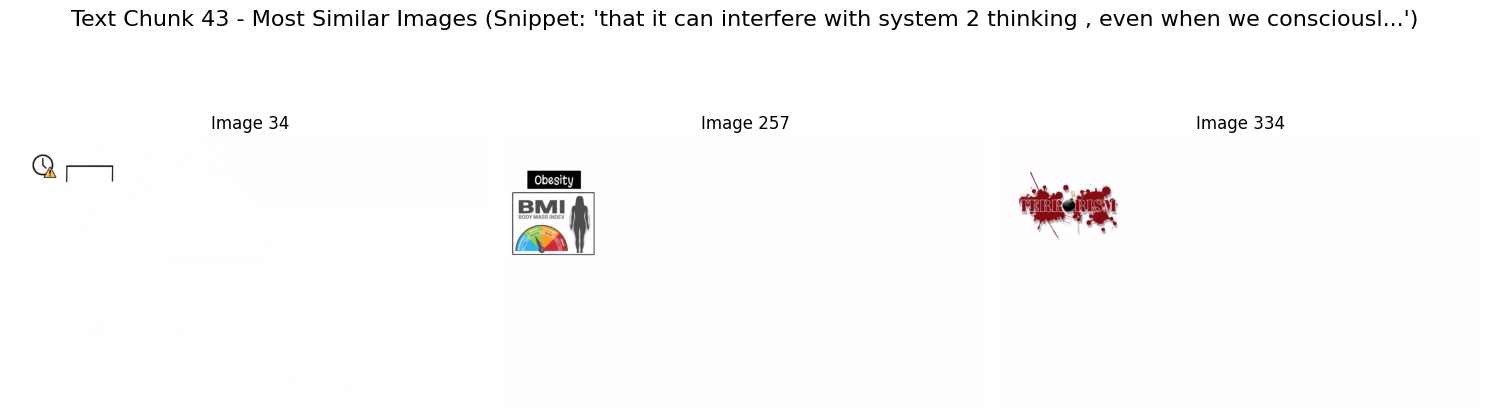


--- Text Chunk 122 ---
Text (first 100 chars): sec style . the stores that were there in 1 9 1 6 were not the same as the ones in 1 9 2 2 . they wo...


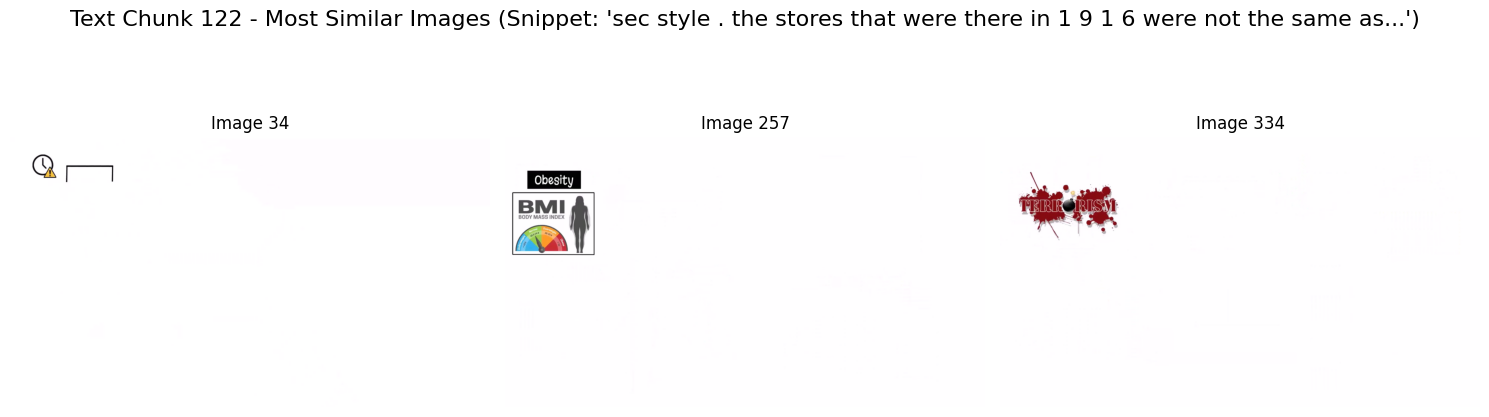


--- Text Chunk 67 ---
Text (first 100 chars): you 're sure to make a choice that will make you more satisfied and happier . until the next video ,...


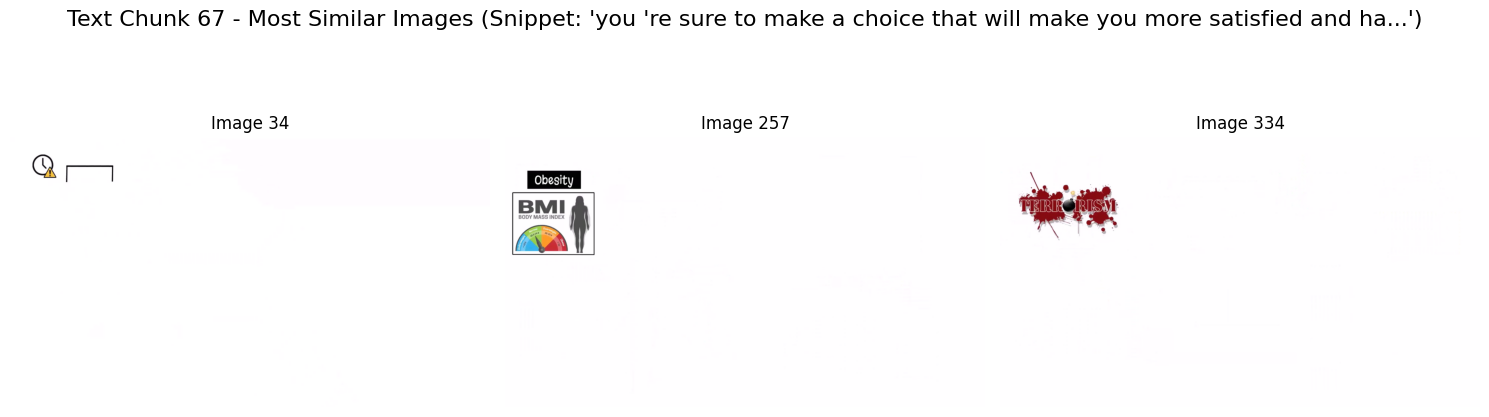


--- Text Chunk 110 ---
Text (first 100 chars): , companies observe this and conclude , well , being in silicon valley is doing wonders for them . m...


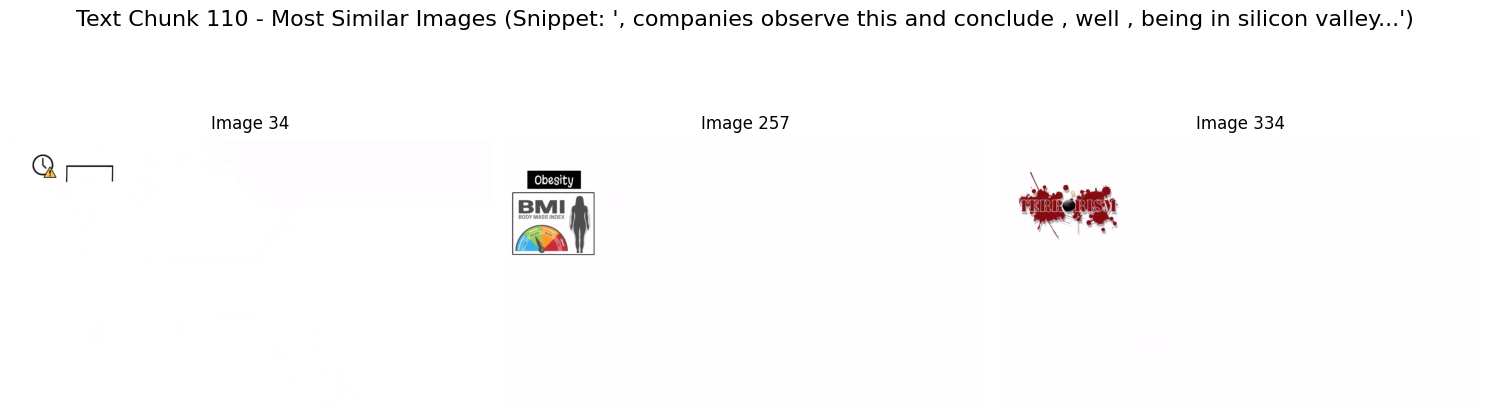


--- Text Chunk 89 ---
Text (first 100 chars): year it would reach 1 0 0 %. now , you could say , ok , diogo , this is ridiculous . no one would ex...


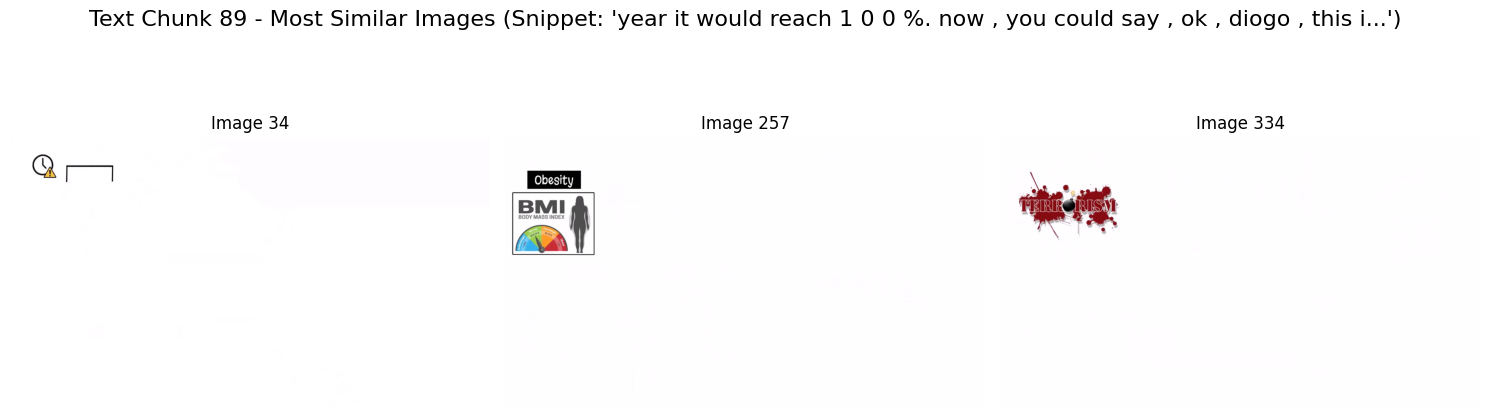

In [ ]:
# Display the selected text chunks and their most similar images
num_random_chunks = len(random_text_indices)

for i in range(num_random_chunks):
    text_idx = random_text_indices[i]
    similar_image_indices = text_to_images_similarities[i]

    # Get the original text chunk for context
    original_text_chunk = tokenizer.decode(transcription_chunks[text_idx])

    print(f"\n--- Text Chunk {text_idx} ---")
    print(f"Text (first 100 chars): {original_text_chunk[:100]}...")

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Text Chunk {text_idx} - Most Similar Images (Snippet: '{original_text_chunk[:70]}...')", fontsize=16)

    for j, img_idx in enumerate(similar_image_indices):
        # Ensure img_idx is within the bounds of image_paths
        if img_idx < len(image_paths):
            img_path = image_paths[img_idx]
            image = Image.open(img_path)

            plt.subplot(1, len(similar_image_indices), j + 1)
            plt.imshow(image)
            plt.title(f"Image {img_idx}")
            plt.axis('off')
        else:
            print(f"Warning: Image index {img_idx} out of bounds for image_paths. Skipping.")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

#Step 9 - Retrieval System

In [ ]:
#Let's define a query
query = "Which cognitive biases are discussed?"


In [ ]:
#Tokenize the query
query_tokens = tokenizer(query,
                         return_tensors = "pt",
                         padding = True)['input_ids']


In [ ]:
#Generate the query embedding in the join embedding space (Use the CLIP model)
with torch.no_grad():
  query_embedding = model.get_text_features(
      input_ids = query_tokens
  ).cpu().numpy().flatten()
  print(f"The shape of the query embedding is {query_embedding.shape}")

The shape of the query embedding is (768,)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#Compute the cosine similarity between the query and the transcripts
query_text_similarities = cosine_similarity([query_embedding],text_embedding_np)[0]
query_text_similarities

array([0.45085666, 0.46923003, 0.46771115, 0.4675082 , 0.46868116,
       0.4681509 , 0.46408308, 0.46762884, 0.46923003, 0.46868116,
       0.46693033, 0.47026765, 0.46618098, 0.47071022, 0.46843645,
       0.46691653, 0.47016194, 0.46765247, 0.46498203, 0.4648506 ,
       0.46905583, 0.46819943, 0.46822426, 0.46864563, 0.46923003,
       0.46868116, 0.46408308, 0.46923003, 0.4685609 , 0.46593767,
       0.46924683, 0.46923003, 0.46923003, 0.4687077 , 0.4636398 ,
       0.46408308, 0.46755192, 0.4670489 , 0.46573356, 0.4685489 ,
       0.4685489 , 0.46573356, 0.46647522, 0.4666987 , 0.4671183 ,
       0.4671183 , 0.4691207 , 0.46236718, 0.4674747 , 0.46958002,
       0.4663844 , 0.46670488, 0.4698137 , 0.46917176, 0.4693969 ,
       0.4664932 , 0.46690646, 0.46885103, 0.4666987 , 0.46408308,
       0.46868116, 0.46870133, 0.46923003, 0.46928474, 0.46622357,
       0.46546838, 0.46868116, 0.4659006 , 0.4671064 , 0.46868116,
       0.46533328, 0.46474794, 0.463537  , 0.4701543 , 0.46732

In [ ]:
#define how many chunks we want
top_k_texts = 10

#Retrieve the indices of the top-k most similar text_chunks
top_k_indices = query_text_similarities.argsort()[-top_k_texts:][::-1]
top_k_indices

array([128,  79,  13, 120,  11,  16,  73,  89,  52, 106])

Gemini developed the code in the cell below. This code could have been a bit more simple. Keep this is mind as you review

In [ ]:
print(f"\nTop {top_k_texts} most similar text chunks to the query:\n")
for i, idx in enumerate(top_k_indices):
    original_text_chunk = tokenizer.decode(transcription_chunks[idx])
    print(f"--- Rank {i+1} (Chunk {idx}) ---")
    print(original_text_chunk)
    print("\n")


Top 10 most similar text chunks to the query:

--- Rank 1 (Chunk 128) ---
you have any stories on decision making that you think are thought - provoking or interesting , please do share . i love to hear other people 's stories . <|endoftext|>


--- Rank 2 (Chunk 79) ---
? let 's do this . until next video , have fun . hey , everyone . let 's talk about anchoring bias . the first case study is about how it affects real estate prices , and it is called the anchoring bias in real estate , a case study . have you ever found yourself using the first piece of information you receive as a reference point when making decisions ? well ,


--- Rank 3 (Chunk 13) ---
? as you can see , the decision you make could have far - reaching effects on the success of your business . narrow framing can limit your thinking and lead you to make poor decisions that may have long - term consequences . so what should you do ? take a step back and consider all of the available options . narrow framing gives too 

# Step 10 - Generation System

In [ ]:
import base64

In [ ]:
#Combine the retrieved text chunks
retrieved_text_list = []
for idx in top_k_indices:
  retrieved_text_list.append(tokenizer.decode(transcription_chunks[idx]))
retrieved_text = "".join(retrieved_text_list)
retrieved_text

"you have any stories on decision making that you think are thought - provoking or interesting , please do share . i love to hear other people 's stories . <|endoftext|>? let 's do this . until next video , have fun . hey , everyone . let 's talk about anchoring bias . the first case study is about how it affects real estate prices , and it is called the anchoring bias in real estate , a case study . have you ever found yourself using the first piece of information you receive as a reference point when making decisions ? well ,? as you can see , the decision you make could have far - reaching effects on the success of your business . narrow framing can limit your thinking and lead you to make poor decisions that may have long - term consequences . so what should you do ? take a step back and consider all of the available options . narrow framing gives too few options and often you just pick either of them .example . he created six segments that ranked the winners in terms of revenue - 

In [ ]:
#Convert the images and append them
base64_images = []
for idx in top_k_indices:
  image_path = image_paths[idx]
  with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')
    base64_images.append(base64_image)
base64_images

['iVBORw0KGgoAAAANSUhEUgAABQAAAALQCAIAAABAH0oBAAEAAElEQVR4nOyddXgVx/rHv2tH464kQQIECe5SvGgLhQothVuh7t5y6+7uRp0CbaFQpEhxJyQEEohAQoy4HF2b3x9zcnIiSHvLpffHfJ48eU727M7OvDO7me+8M+9wRCc4I9yZT2EwGAwGg8FgMBgMBuOfDH++M8BgMBgMBoPBYDAYDMZ/AyaAGQwGg8FgMBgMBoNxQcAEMIPBYDAYDAaDwWAwLgiYAGYwGAwGg8FgMBgMxgUBE8AMBoPBYDAYDAaDwbggYAKYwWAwGAwGg8FgMBgXBEwAMxgMBoPBYDAYDAbjgoAJYAaDwWAwGAwGg8FgXBAwAcxgMBgMBoPBYDAYjAsCJoAZDAaDwWAwGAwGg3FBwAQwg8FgMBgMBoPBYDAuCERw5zsLDAaDwWAwGAwGg8FgnHuYB5jBYDAYDAaDwWAwGBcETAAzGAwGg8FgMBgMBuOCgAlgBoPBYDAYDAaDwWBcEDABzGAwGAwGg8FgMBiMCwImgBkMBoPBYDAYDAaDcUHABDCDwWAwGAwGg8FgMC4ImABmMBgMBoPBYDAYDMYFARPADAaDwWAwGAwGg8G4IGACmMFgMBgMBoPBYDAYFwRMADMYDAaDwWAwGAwG44KACWAGg8FgMBgMBoPBYFwQMAHMYDAYDAaDwWAwGIwLAiaAGQwGg8FgMBgMBoNxQcAEMIPBYDAYDAaDwWAwLgiYAGYwGAwGg8FgMBgMxgUBE8AMBoPBYDAYDAaDwbggYAKYwWAwGAwGg8FgMBgXBEwAMxgMBoPBYDAYDAbjgoAJYAaDwWAwGAwGg8FgXBAwAcxgMBgMBoPBYDAYjAsCJoAZDAaDwWAwGAwGg3FBwAQwg8FgMBgMBoPBYDAuCJgAZjAYDAaDwWAwGAzGBQETwAwGg8FgMBgMBoPBuCBgApjBYDAYDAaDwWAwGBcETAAzGAwGg8FgMBgMBu

In [ ]:
#Define the mode and system prompt
MODEL = "gpt-4o-mini"
system_prompt = """
You are an expert teacher that summarizes visual and transcribed content
"""

In [ ]:
#Prepare the user message content
user_message_content = [
    "There are the frames from the video",
    *map(lambda x: {"type": "image_url",
                    "image_url": {"url": f'data:image/jpg;base64,{x}'}
                    },
         base64_images),
    {"type": "text",
     "text": retrieved_text}
]

In [ ]:
#Call the OpenAI API to generate a summary
response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_message_content},
    ],
    temperature = 0.3,
)

In [ ]:
#Generate the response
generated_response = response.choices[0].message.content
print(generated_response)

It sounds like you're exploring some fascinating concepts in decision-making and cognitive biases! Here are a few thought-provoking stories related to decision-making that illustrate these concepts:

1. **The Anchoring Effect in Real Estate**: A real estate agent once showed a couple two houses. The first was listed at $500,000, and the second at $700,000. When they later saw a third house listed at $600,000, they felt it was a great deal because their reference point was the first house. This illustrates how the initial price (anchor) influenced their perception of value.

2. **Loss Aversion in Marketing**: A company launched a new product with a promotional offer: "Buy one, get one free." Sales were mediocre. They then changed the offer to "Buy one, get one at half price." Surprisingly, sales increased. This shift highlights how people are more motivated to avoid losses (paying full price) than to seek gains (getting a free item).

3. **The Endowment Effect**: In a study, participant